## Helper tools

In [2]:
import scipy.io as sio
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%matplotlib inline

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Exercise 2

In [4]:
mat = sio.loadmat('assignment6_1.mat')
A = mat['A']
B = mat['B']

### Part 1a

Mean and variance estimation for classes A and B

In [5]:
def mean(matr):
    return np.mean(matr, axis = 1)

def covariance(matr):
    return np.cov(matr)

In [6]:
mean_A, mean_B = mean(A), mean(B)
cov_A, cov_B = covariance(A), covariance(B)

In [7]:
print "cov_A = {}, cov_b = {}".format(cov_A, cov_B)

SyntaxError: invalid syntax (<ipython-input-7-c61faa51645b>, line 1)

In [ ]:
print "mean_A = {}, mean_B = {}".format(mean_A, mean_B)

### Part 1b
No --- further explananations in the report

### Part 1c

In [ ]:
total = np.concatenate((A, B), axis = 1)
cov_total = covariance(total)
mean_total = mean(total)
print "mean = ", mean_total
print "cov_total = ", cov_total


U, s, V = np.linalg.svd(cov_total)
print "eigenvalues = ", s

In [ ]:
u1 = U[:, 0]
print "first eigenvector = ", u1

In [ ]:
var_ratio = s[0] / sum(s)
print "variance covered = ", var_ratio

### Part 1d

Project the points on the first eigenvector

In [8]:
proj_A = A.T.dot(u1)
proj_B = B.T.dot(u1)

NameError: name 'u1' is not defined

Mean and variance of the projected data for each class separately (to fit the gaussian distribution)

In [12]:
mean_proj_A, mean_proj_B = np.mean(proj_A), np.mean(proj_B)
var_proj_A, var_proj_B = np.var(proj_A, ddof = 1), np.var(proj_B, ddof = 1)
print "mean_proj_A = ", mean_proj_A, ", mean_proj_B = ", mean_proj_B
print "var_proj_A = ", var_proj_A, ", var_proj_B = ", var_proj_B

mean_proj_A =  -4.15394557387 , mean_proj_B =  6.2309183608
var_proj_A =  20.4782002529 , var_proj_B =  13.7120291418


Compute the posterior probability for classification:

In [13]:
from scipy.stats import multivariate_normal

In [14]:
p_A = float(len(proj_A)) / (len(proj_A) + len(proj_B))
p_B = float(len(proj_B)) / (len(proj_A) + len(proj_B))
print p_A, p_B

0.6 0.4


In [15]:
def posterior_proj(x, eigenvector, mean_A, mean_B, var_A, var_B):
    proj = x.dot(eigenvector)
    print "proj = ", proj
    p_x_A = multivariate_normal.pdf(proj, mean = mean_A, cov = var_A)
    p_x_B = multivariate_normal.pdf(proj, mean = mean_B, cov = var_B)
    return p_x_A * p_A / (p_x_A * p_A  + p_x_B * p_B)

def classify(point, eigenvector, post_function, mean_A, mean_B, var_A, var_B):
    posterior_c_A = post_function(point, eigenvector, mean_A, mean_B, var_A, var_B)
    print "posterior_A = ", posterior_c_A
    return "A" if posterior_c_A > 0.5 else "B"

In [16]:
class_x = classify(np.array([2, 1, 7]) - mean_total, u1, posterior_proj, 
                   mean_proj_A, mean_proj_B, var_proj_A, var_proj_B)
print "class for x = ", class_x

proj =  -5.81800969889
posterior_A =  0.995640724581
class for x =  A


### Part 1e

In [17]:
U[:, 1]

array([ 0.60063901, -0.79829193, -0.04430321])

In [18]:
var_ratio = (s[0] + s[1]) / sum(s)
print "variance covered = ", var_ratio

variance covered =  0.997466311285


In [19]:
proj_two_A = A.T.dot(U[:, :2])
proj_two_B = B.T.dot(U[:, [0, 1]])

In [20]:
mean_proj_two_A, mean_proj_two_B = np.mean(proj_two_A, axis = 0), np.mean(proj_two_B, axis = 0)
cov_proj_A, cov_proj_B = np.cov(proj_two_A.T), np.cov(proj_two_B.T)
print "mean_proj_two_A = ", mean_proj_two_A, ", mean_proj_two_B = ", mean_proj_two_B
print "cov_proj_A = \n", cov_proj_A, ",\ncov_proj_B = \n", cov_proj_B

mean_proj_two_A =  [-5.62064352  0.01879364] , mean_proj_two_B =  [ 4.76422041 -0.24487686]
cov_proj_A = 
[[ 20.47820025  -0.9538918 ]
 [ -0.9538918    1.63649841]] ,
cov_proj_B = 
[[ 13.71202914   3.08439962]
 [  3.08439962   1.38019906]]


In [21]:
class_two_x = classify(np.array([2, 1, 7]), U[:, [0, 1]], posterior_proj,
                       mean_proj_two_A, mean_proj_two_B, cov_proj_A, cov_proj_B)
print "class for x = ", class_two_x

proj =  [-7.28470765  0.09286361]
posterior_A =  0.999992329261
class for x =  A


# Exercise 3

In [22]:
train = sio.loadmat('breast_cancer/breast_cancer_train.mat')['breast_cancer_train']
val = sio.loadmat('breast_cancer/breast_cancer_val.mat')['breast_cancer_val']

In [23]:
labels = {'b': 2, 'm': 4}
names, counts = np.unique(train[:, 10], return_counts = True)
priors = counts / float(sum(counts))
print "priors =", zip(names, priors)

priors = [(2, 0.65036674816625917), (4, 0.34963325183374083)]


In [57]:
def estimate_pdf_class(features, class_label, pca = False, eigenvector = None, verbose = False):
    if pca:
        data = train[train[:, 10] == labels[class_label]][:, 1:10].dot(eigenvector)
    else:
        data = train[train[:, 10] == labels[class_label]][:, features]
    mean = np.mean(data, axis = 0)
    cov = np.cov(data.T)
    if verbose:
        print "columns = {}, \n class = {}".format(features, class_label)
        print "mean = {}, \n cov = \n {}".format(mean, cov)
        print('=====================')
    return multivariate_normal(mean = mean, cov = cov)

def posterior(x, pdf_b, pdf_m, priors, pca=False, eigenvector = None):
    if pca:
        x = x.dot(eigenvector)
    p_x_b = pdf_b.pdf(x)
    p_x_m = pdf_m.pdf(x)
    return p_x_b * priors[0] / (p_x_b * priors[0]  + p_x_m * priors[1])

def classify(point, posterior, pdf_b, pdf_m, priors, pca=False, eigenvector = None):
    posterior_c_b = posterior(point, pdf_b, pdf_m, priors, pca, eigenvector)
    return labels['b'] if posterior_c_b > 0.5 else labels['m']

In [25]:
def estimate_metrics(y_test, output):
    acc = accuracy_score(y_test, output)
    print "error = ", 1 - acc

    prec_m = precision_score(y_test, output, pos_label = labels['m'])
    rec_m = recall_score(y_test, output, pos_label = labels['m'])
    print "precision = {}, recall = {}".format(prec_m, rec_m)

    cm = confusion_matrix(y_test, output)
    plot_confusion_matrix(cm, ['b', 'm'])

def report_statistics(x_test, y_test, pdf_b, pdf_m, priors, pca=False, eigenvector = None):
    output = [classify(x, posterior, pdf_b, pdf_m, priors, pca, eigenvector) for x in x_test]
    estimate_metrics(y_test, output)
    

## Part a

### x2 (Clump Thickness) only

In [26]:
features = 1
pdf_b = estimate_pdf_class(features, 'b', verbose = True)
pdf_m = estimate_pdf_class(features, 'm', verbose = True)

columns = 1, 
 class = b
mean = 2.93609022556, 
 cov = 2.73929635409
columns = 1, 
 class = m
mean = 7.13286713287, 
 cov = 6.21461636955


#### Statistics for train set (x2 clump Thickness only)

error =  0.136919315403
precision = 0.906542056075, recall = 0.678321678322
Confusion matrix, without normalization


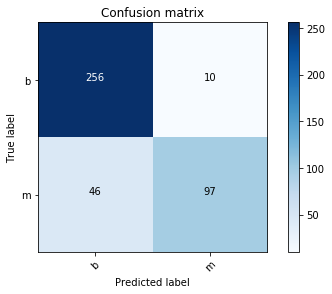

In [27]:
report_statistics(train[:, features], train[:, 10], pdf_b, pdf_m, priors)

#### Statistics for val set (x2 clump Thickness only)

error =  0.14598540146
precision = 0.868421052632, recall = 0.6875
Confusion matrix, without normalization


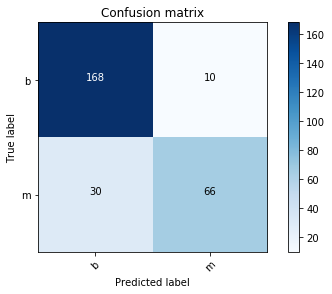

In [28]:
report_statistics(val[:, features], val[:, 10], pdf_b, pdf_m, priors)

### First principal component

In [29]:
cov_total = np.cov(train[:, 1:10].T)
U, s, V = np.linalg.svd(cov_total)
print "eigenvalues = ", s

eigenvalues =  [ 47.76526357   5.14873614   4.28161683   2.936769     2.83583048
   2.39663936   1.86315484   1.40895111   0.85125718]


In [30]:
var_ratio = s[0] / sum(s)
print "variance covered = ", var_ratio

variance covered =  0.68738650364


In [31]:
pdf_b = estimate_pdf_class("1 princ component", 'b', pca =  True, eigenvector = U[:, 0], verbose = True)
pdf_m = estimate_pdf_class("1 princ component", 'm', pca =  True, eigenvector = U[:, 0], verbose = True)

columns = 1 princ component, 
 class = b
mean = -4.71846346489, 
 cov = 3.56621022232
columns = 1 princ component, 
 class = m
mean = -17.7296048436, 
 cov = 19.7099754791


#### Statistics for train set (first principal component)

error =  0.0366748166259
precision = 0.932432432432, recall = 0.965034965035
Confusion matrix, without normalization


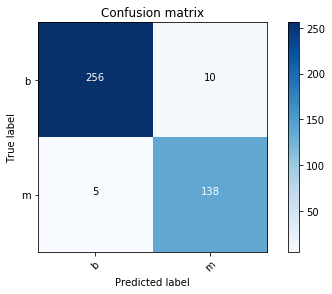

In [32]:
report_statistics(train[:, 1:10], train[:, 10], pdf_b, pdf_m, priors, pca=True, eigenvector = U[:, 0])

#### Statistics for val set (first principal component)

error =  0.014598540146
precision = 0.969387755102, recall = 0.989583333333
Confusion matrix, without normalization


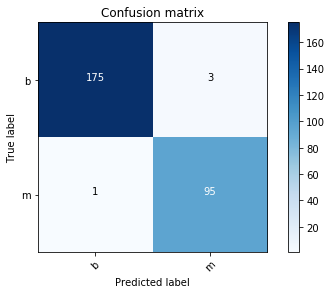

In [33]:
report_statistics(val[:, 1:10], val[:, 10], pdf_b, pdf_m, priors, pca=True, eigenvector = U[:, 0])

### x2 and x7 (Bare Nuclei) only

In [34]:
features = [1, 6]
pdf_b = estimate_pdf_class(features, 'b', verbose = True)
pdf_m = estimate_pdf_class(features, 'm', verbose = True)

columns = [1, 6], 
 class = b
mean = [ 2.93609023  1.36466165], 
 cov = [[ 2.73929635  0.2196198 ]
 [ 0.2196198   1.47029366]]
columns = [1, 6], 
 class = m
mean = [ 7.13286713  7.70629371], 
 cov = [[ 6.21461637  0.08155225]
 [ 0.08155225  9.08214321]]


#### Statistics for train set (x2 and x7 (Bare Nuclei) only)

error =  0.0586797066015
precision = 0.916083916084, recall = 0.916083916084
Confusion matrix, without normalization


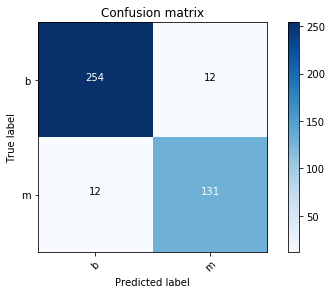

In [35]:
report_statistics(train[:, features], train[:, 10], pdf_b, pdf_m, priors)

#### Statistics for val set (x2 and x7 (Bare Nuclei) only)

error =  0.0547445255474
precision = 0.917525773196, recall = 0.927083333333
Confusion matrix, without normalization


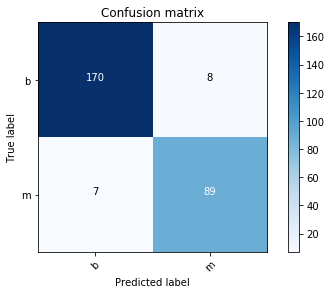

In [36]:
report_statistics(val[:, features], val[:, 10], pdf_b, pdf_m, priors)

### First two principal components

In [37]:
var_ratio = (s[0] + s[1]) / sum(s)
print "variance covered = ", var_ratio

variance covered =  0.761481598492


In [53]:
pdf_b = estimate_pdf_class("1, 2 princ component", 'b', pca =  True, eigenvector = U[:, [0, 1]], verbose = True)
pdf_m = estimate_pdf_class("1, 2 princ component", 'm', pca =  True, eigenvector = U[:, [0, 1]], verbose = True)

columns = 1, 2 princ component, 
 class = b
mean = [-4.71846346  0.65931253], 
 cov = [[ 3.56621022 -0.12858286]
 [-0.12858286  0.93153259]]
columns = 1, 2 princ component, 
 class = m
mean = [-17.72960484   0.20953023], 
 cov = [[ 19.70997548  -3.59290625]
 [ -3.59290625  12.9226298 ]]


#### Statistics for train set (first two principal components)

error =  0.0366748166259
precision = 0.926666666667, recall = 0.972027972028
Confusion matrix, without normalization


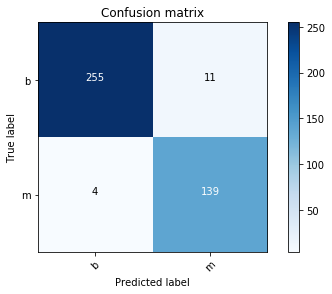

In [39]:
report_statistics(train[:, 1:10], train[:, 10], pdf_b, pdf_m, priors, pca=True, eigenvector = U[:, [0, 1]])

#### Statistics for val set  (first two principal components)

error =  0.021897810219
precision = 0.959183673469, recall = 0.979166666667
Confusion matrix, without normalization


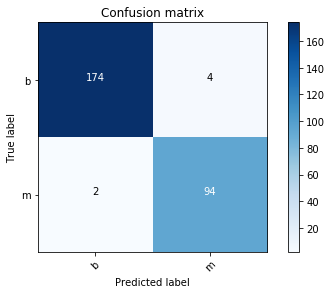

In [40]:
report_statistics(val[:, 1:10], val[:, 10], pdf_b, pdf_m, priors, pca=True, eigenvector = U[:, [0, 1]])

### The principal components which explain 80% of the variance

In [41]:
var_ratio = (s[0] + s[1] + s[2]) / sum(s)
print "variance covered = ", var_ratio

variance covered =  0.823098041194


In [55]:
pdf_b = estimate_pdf_class("1, 2, 3 princ component", 'b', pca =  True, eigenvector = U[:, [0, 1, 2]], verbose = True)
pdf_m = estimate_pdf_class("1, 2, 3 princ component", 'm', pca =  True, eigenvector = U[:, [0, 1, 2]], verbose = True)

columns = 1, 2, 3 princ component, 
 class = b
mean = [-4.71846346  0.65931253  1.05929594], 
 cov = [[ 3.56621022 -0.12858286 -0.6351888 ]
 [-0.12858286  0.93153259  0.31212293]
 [-0.6351888   0.31212293  1.69077815]]
columns = 1, 2, 3 princ component, 
 class = m
mean = [-17.72960484   0.20953023   1.43781209], 
 cov = [[ 19.70997548  -3.59290625   4.41095285]
 [ -3.59290625  12.9226298   -0.47097832]
 [  4.41095285  -0.47097832   9.05294776]]


#### Statistics for train set (80% of the variance)

error =  0.0366748166259
precision = 0.921052631579, recall = 0.979020979021
Confusion matrix, without normalization


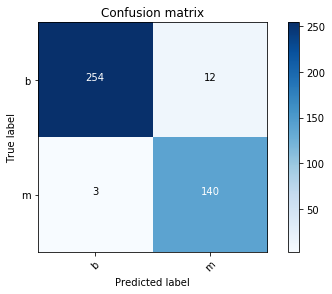

In [56]:
report_statistics(train[:, 1:10], train[:, 10], pdf_b, pdf_m, priors, pca=True, eigenvector = U[:, [0, 1, 2]])

#### Statistics for val set (80% of the variance)

error =  0.021897810219
precision = 0.959183673469, recall = 0.979166666667
Confusion matrix, without normalization


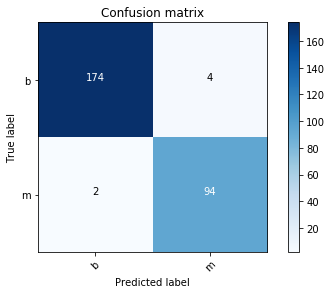

In [44]:
report_statistics(val[:, 1:10], val[:, 10], pdf_b, pdf_m, priors, pca=True, eigenvector = U[:, [0, 1, 2]])

### all inputs (except sample code number)

In [58]:
features = np.arange(1, 10)
pdf_b = estimate_pdf_class(features, 'b', verbose = True)
pdf_m = estimate_pdf_class(features, 'm', verbose = True)

columns = [1 2 3 4 5 6 7 8 9], 
 class = b
mean = [ 2.93609023  1.30827068  1.42481203  1.35714286  2.07142857  1.36466165
  2.07518797  1.30827068  1.07518797], 
 cov = 
 [[  2.73929635e+00   3.97134345e-01   4.87629451e-01   3.36118598e-01
    1.93261456e-01   2.19619804e-01   2.99163002e-01   5.10341892e-01
    1.04979430e-03]
 [  3.97134345e-01   6.97063413e-01   6.00624202e-01   1.80053908e-01
    2.60916442e-01   4.26783941e-01   2.89941836e-01   5.38572847e-01
    3.33380621e-02]
 [  4.87629451e-01   6.00624202e-01   9.99985814e-01   1.94878706e-01
    2.78975741e-01   4.02993332e-01   2.20768903e-01   4.94963825e-01
    9.44814867e-03]
 [  3.36118598e-01   1.80053908e-01   1.94878706e-01   8.71967655e-01
    1.85714286e-01   4.39083558e-01   1.39083558e-01   2.93261456e-01
    5.98382749e-02]
 [  1.93261456e-01   2.60916442e-01   2.78975741e-01   1.85714286e-01
    7.45822102e-01   3.02156334e-01   1.07816712e-01   3.40161725e-01
   -5.39083558e-03]
 [  2.19619804e-01   4.26783

#### Statistics for train set (all inputs)

error =  0.0488997555012
precision = 0.896774193548, recall = 0.972027972028
Confusion matrix, without normalization


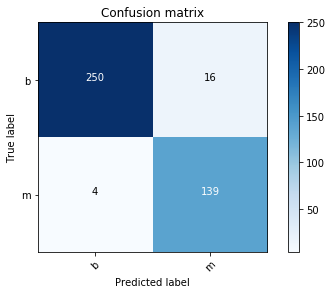

In [46]:
report_statistics(train[:, features], train[:, 10], pdf_b, pdf_m, priors)

#### Statistics for val set  (all inputs)

error =  0.0328467153285
precision = 0.930693069307, recall = 0.979166666667
Confusion matrix, without normalization


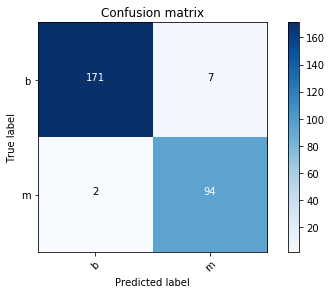

In [47]:
report_statistics(val[:, features], val[:, 10], pdf_b, pdf_m, priors)

## Exercise 4

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression()
clf.fit(train[:, 1:10], train[:, 10])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
output_train = clf.predict(train[:, 1:10])
output_val = clf.predict(val[:, 1:10])

#### Statistics for train set (logistic classifier)

error =  0.0342298288509
precision = 0.957446808511, recall = 0.944055944056
Confusion matrix, without normalization


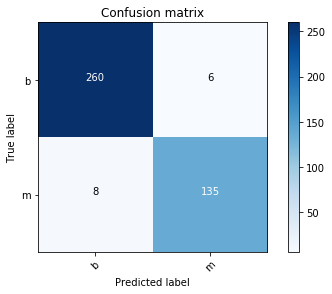

In [51]:
estimate_metrics(train[:, 10], output_train)

#### Statistics for val set (logistic classifier)

error =  0.021897810219
precision = 0.978723404255, recall = 0.958333333333
Confusion matrix, without normalization


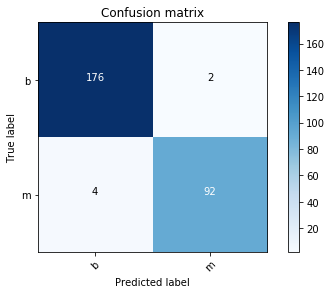

In [52]:
estimate_metrics(val[:, 10], output_val)